In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [3]:
# let's process multiple files at once - I want some nicer statistic
# this is a time-ordered file of filenames for SM1 or SM2

#fov = 2
#pathfile = "../filenames_sm{}.txt".format(fov)
#pathfile = "split_filenames/filenames_sm{}_clean.txt".format(fov)

#pathfile = "split_filenames/sm_abspaths_clean.txt"
pathfile = "split_filenames/sm_all_paths.txt"

allfiles = []
f = open(pathfile, 'r')
allfiles = f.readlines()
f.close()

# strip away newlines and add absolute path prefix
allfiles = ["../../"+s.strip() for s in allfiles]

In [7]:
years=list(range(2014,2019))
months=list(range(1,13))
days=list(range(1,32))

f_day = [0 for ii in range(len(years)*len(months)*len(days))]
f_month = [0 for ii in range(len(years)*len(months))]
f_year = [0 for ii in range(len(years))]

In [8]:
def getdayindex(year,month,day):
    iy = years.index(year)
    im = months.index(month)
    iday = days.index(day)
    
    return iy*len(months)*len(days)+im*len(days)+iday

In [9]:
import re as regex

# daily binning
for file in allfiles:
    groups = regex.search("([0-9]+)-([0-9]+)-([0-9]+)", file)
    year = int(groups[1])
    month = int(groups[2])
    day = int(groups[3])
    f_day[getdayindex(year,month,day)]+=1
    
# monthly binning
for ii in range(len(f_month)):
    f_month[ii]+=sum(f_day[ii*31:(ii+1)*31])
    
for ii in range(len(f_year)):
    f_year[ii]+=sum(f_month[ii*12:(ii+1)*12])

# yearly binning

([<matplotlib.axis.XTick at 0x7f89dc208ac8>,
 <a list of 5 Text xticklabel objects>)

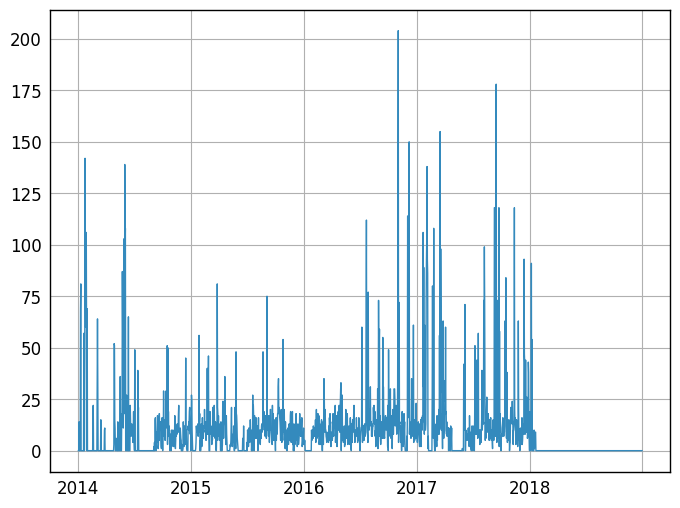

In [10]:
plt.plot(f_day)
plt.xticks(range(0,len(days)*len(years)*len(months)+1,len(months)*len(days)), years)
#plt.ylim(0,20)
#plt.xlim(900,1000)

Indices with at least daily binning (SM1 AND SM2):

- 600 - 650
- 770 - 800
- 940 - 980
- 1310 - 1360

([<matplotlib.axis.XTick at 0x7f89d8d81438>,
 <a list of 5 Text xticklabel objects>)

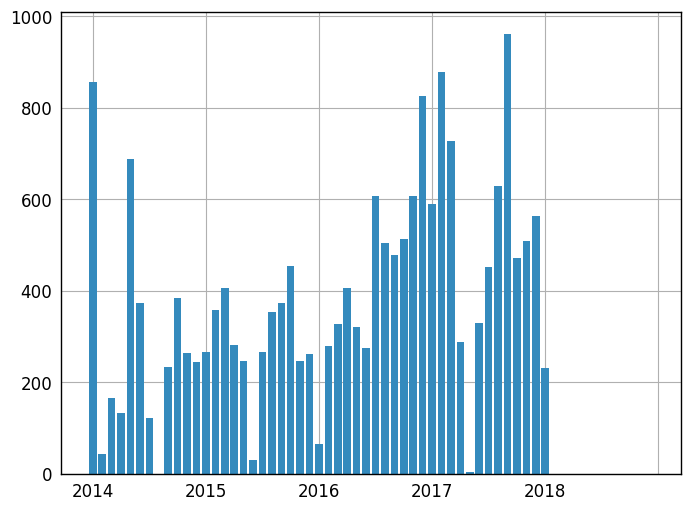

In [11]:
plt.bar(range(len(f_month)), f_month)
plt.xticks(range(0,12*len(years)+1,12),years)

([<matplotlib.axis.XTick at 0x7f89d8f83a58>,
 <a list of 5 Text xticklabel objects>)

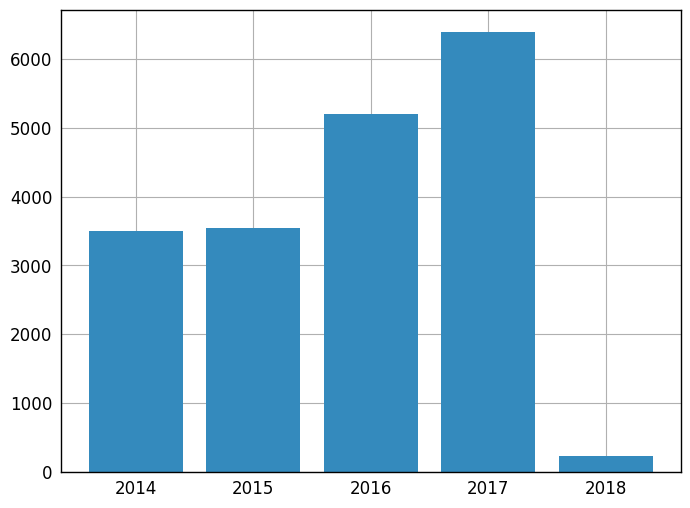

In [12]:
plt.bar(range(len(f_year)), f_year)
plt.xticks(range(len(years)),years)

In [13]:
np.sum(np.array(f_day)>0)

1136